# Palmer's Adelie - A Closer Look at Penguin Populations
### Principals of Data Analytics Project


***

![Palmer](img/penguins.png)

[Artwork by @allison_horst](https://allisonhorst.github.io/palmerpenguins/articles/art.html)

The data set is available [on GitHub](https://allisonhorst.github.io/palmerpenguins/).



## Introduction
***
This notebook contains my analysis of the famous palmer Palmer Penguins dataset. 

Palmer Penguins data set contains real-world body size measurements for three Pygoscelis penguin species that breed throughout the Western Antarctic Peninsula region, made available through the United States Long-Term Ecological Research (US LTER) Network. This data set is used as a great resource for study cases in statistics and data science education. [Source: 1]

The dataset contains data about 344 penguins collected between 2007 - 2009 by [Dr Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and [The Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/) a member of the [Long Term Ecological Research Network](https://lternet.edu/).[Source: 2]

The dataset I'm using is called penguins.csv and it’s downloaded from [mwaskom/seaborn-data repository](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv). This file is an updated version of the original file and it's easier to read in python.
penguins.csv file is a coma separated values file - which is a text file that can be decoded using ASCII table. This means that each character in this file corresponds to a combination of 0's and 1's in the ASCII table. 
At the first look of the file, we can see that each line in the file represents data about one single penguin and for each of them the information collected is:
- Species - the type of penguin.
- Island - the place where the penguins lived.
- bill_length_mm - penguin's bill length in mm.
- bill_depth_mm - penguin's bill length in mm.
- flipper_length_mm - penguin's flipper length in mm.
- body_mass_g - penguin's body mass in grams(g).
- sex - sex of penguin.


![bill length](img/bill_length.png)

[Artwork by @allison_horst](https://allisonhorst.github.io/palmerpenguins/)

## Imports

***

The following are the  libraries I will use to explore this dataset:
- pandas - the DataFrame data structure.
- matplotlib - plotting data.
- seaborn - statistical graphics.
- numpy - working with arrays.
- skim from skimpy - summarize datasets.
- pearsonr from scipy.stats - calculate Pearson's correlation coefficient.
- warning - remove any unwanted message from running the code.

Theses libraries will allows us to investigate CSV files, amongst other features.

In [278]:
# Data frame.
import pandas as pd
# Plotting.
import matplotlib.pyplot as plt 
# Subplotting.
import seaborn as sns 
# Numerical arrays.
import numpy as np 
# Generating quick summaries.
from skimpy import skim
# Pearson's correlation coefficient.
from scipy.stats import pearsonr
# importing warning to deal with warning messages.
import warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

***
## Overview of the dataset.
***


#### Load Data
***
As the first step I will load the dataset and then I will run a few commands to check that the file is loaded correctly. With  that I can get an initial idea about the dataset and values present in it.

In [279]:
# Load the penguins data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [280]:
# Checking that the file is loaded correctly.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


As we can see, from the data displayed above, this dataset has has 344 rows and 7 columns. Displayed is the header of the file, the first five rows and the last five rows. the dots in the middle tell us that more data is stored in this file.

## Inspecting Palmer Penguins DataSet.

***

Lets start by checking what data type is stored in this file.

In [281]:
# checking the data types.
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

From the above results we can see that:
 - bill_length_mm, bill_depth_mm, flipper_length_mm and body_mass_mm are all storing float64 data type, which is a double precision floating-point number format. This type of format occupies 64 bits in computer memory. 
 - Species, island and sex are storing object data type and can store any kind of data like strings of characters, numbers, lists etc... In this dataset they are storing strings.

After dataset is loaded I am going to check the dataset again, this time I will check if there are any null values on it. Depending on the amount of null values on the dataset I will decide if I can use them in my analysis or remove them completely from the dataset.

In [282]:
# Here we check if there are any values missing in this dataset.
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

The values missing in this dataset are:

- 2 values in each of bill_length_mm, bill_depth_mm, flipper_length_mm and body_mass_g.
- 11 val missing in sex of penguins.

The number of rows with null values is 11. In my opinion if I remove the raws with null values from the dataset it will not affect the outcome of my analysis.
After removing null values I will run the same code again to check if the commands worked.

In [283]:
# removing the null values. [Source 3]
df.dropna(axis=0, inplace=True)

In [284]:
# Here we check again if there are still any values missing in the dataset.
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

As we can see from the output of the above command(df.isnull().sum()) there are no null values left in our dataset.
Using .info() function I can get a detailed info about the dataset. 

In [285]:
# Let's check the dataset again using .info function.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Now our dataset is ready. We have 333 non-null entries in the dataset. In the first line we can see that dataframe 'df' is how holding 333 entries, 11 less than before. This because of all the null values removed before.

##### Other information we can get:

In [286]:
# Look at the first row 'iloc' means index location.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [287]:
# Sex of penguins
df['sex']


0        MALE
1      FEMALE
2      FEMALE
4      FEMALE
5        MALE
        ...  
338    FEMALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 333, dtype: object

Next I'm going to check how many female and male penguins are in our dataset.

In [288]:
df["sex"].value_counts()   

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In the next section using df.describe() function we can get some statistical description of the data in the DataFrame:
- count - The number of not-empty values.
- mean - The average (mean) value.
- std - The standard deviation.
- min - the minimum value.
- 25% - The 25% percentile - how many of the values are less than 25%.
- 50% - The 50% percentile -  how many of the values are less than 50%.
- 75% - The 75% percentile -  how many of the values are less than 75%
- max - the maximum value. [Source 4]

In [289]:
# Describe the data set
penguins_table = df.describe()
penguins_table

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Using 'skim' from skimpy library we can have a more detailed summary of the DataFrame in a well-formated output. From this table we get the following information:
- Data Summary - how many rows and columns in the dataset.
- Data Types - information about data type of each column. In our DataFrame there are 4 columns of float64 and 3 columns storing string data type.
- Details of data organized by data type - this includes column name, missing values and percentage of them in each column. It also calculates the mean, standard deviation, min and max value, percentile and histogram for numbers(float64 in our example). 

Please note that the values in columns holding numbers(float64) are rounded up between 1-3 decimal point.

In [290]:
# A detailed summary using skimpy
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 333    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ bill_length_mm        │   0 │      0 │   43.99 │   5.469 │  32.1 │  39.5 │  44.5 │  48.6 │  59.6 │  ▃▇▆▇▃  │  │
│ │ bill_depth_mm         │   0 │      0 │   17.16 │   1.969 │  13.1 │  15.6 │  17.3 │  18.7 │  21.5 │ ▃▅▆▇▆▁  │  │
│ │ flipper_length_mm     │   0 │      0 │     201 │   14.02 │   172 │   190 │   197 │   213 │   231 │ ▂▇▇▃▆▃  │  │
│ │ body_mass_g           │   0 │      0 │    4207 │   805.2 │  2700 │  3550 │  4050 │  4775 │  6300 │ ▂▇▆▅▃▁  │  │
│ └───────────────────────┴─────┴────────┴─────────┴─────────┴───────┴───────┴───────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ species                   │       0 │          0 │                            1 │                      333 │  │
│ │ island                    │       0 │          0 │                            1 │                      333 │  │
│ │ sex                       │       0 │          0 │                            1 │                      333 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

***
### Analyzing the DataFrame
***

First we can have a look at our numerical data. I am starting by creating a histogram of each numerical variable using 'seaborn.hisplot' command. This will show us visually the distribution of values for each variable in out dataset.

<Axes: xlabel='body_mass_g', ylabel='Count'>

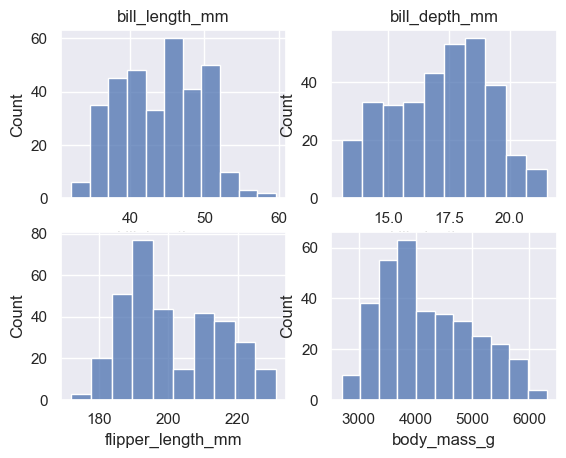

In [291]:
# Plotting the distribution of each quantitative(numerical) variable.
fig, axes = plt.subplots(2, 2)
sns.histplot(data=df, x='bill_length_mm', ax=axes[0,0]).set_title("bill_length_mm")
sns.histplot(data=df, x="bill_depth_mm", ax=axes[0,1]).set_title("bill_depth_mm")
sns.histplot(data=df, x="flipper_length_mm", ax=axes[1,0])
sns.histplot(data=df, x="body_mass_g", ax=axes[1,1])

Another way of analyzing our dataset numerical variables will be using pairplot command. The pairplot visually represents the relationship between our numerical variables.

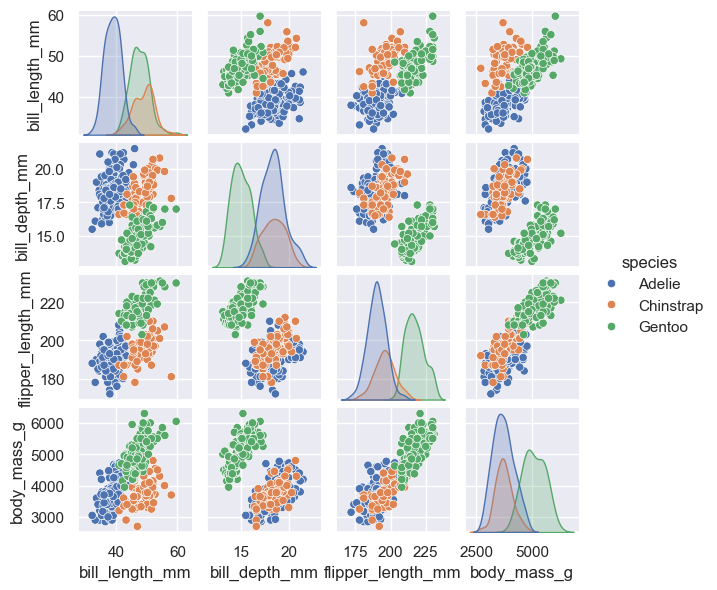

In [292]:
sns.pairplot(df, hue='species', height=1.5)

From the above graph we can see that Adelie penguins reach the highest values in all our numerical data.

- Next step I will check how many penguins of each species are in each island.

We can check distribution of Penguins in each island in two ways:
- As a simple table using pandas library.
- or as a histogram using using seaborn library.

In [293]:
# Distribution of penguins in each island using pandas library.
penguins_in_islands = pd.DataFrame(df.groupby(["island", "species"])['island'].count().rename('number'))
penguins_in_islands

number
island    species          
Biscoe    Adelie         44
          Gentoo        119
Dream     Adelie         55
          Chinstrap      68
Torgersen Adelie         47

Text(0.5, 1.0, 'Distribution of Penguins by Island')

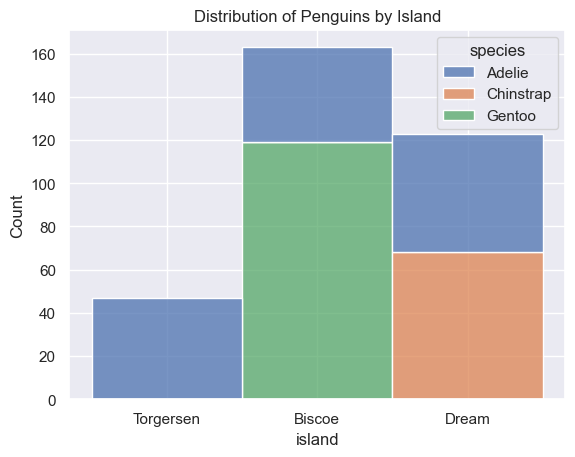

In [294]:
# Distribution of penguins in each island using seaborn.
sns.histplot(data=df, x="island", hue="species", multiple="stack").set_title("Distribution of Penguins by Island")

The dataset shows that the number of Adelie penguins is nearly the same in each island and is the only one of the three species that is present in all of them. The other species live in one island only, Chinstrap species live in Dream island and Gentoo in Biscoe island.

__Question:__
1. Why Adelie penguins are populating three islands when Chinstrap and Gentoo penguins live in one island each, Dream island and Biscoe island respectively?
2. Are there any differences between Adelie species leaving in different islands?

***
__Analyzing Adelie Penguins__

I have decided to further analyze Adelie penguins by creating a new subset of our dataset for them. After created the subset I'm going to use skimpy to get a full data summary of the Adelie subset.

In [295]:
# Create a subset for Adelie penguins only
adelie_penguins = df[df['species'] == 'Adelie']

In [296]:
# Get a detailed summary of adelie_penguins subset.
skim(adelie_penguins)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 146    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name           ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ bill_length_mm        │   0 │     0 │   38.82 │  2.663 │  32.1 │  36.73 │  38.85 │  40.77 │    46 │ ▁▆▇▇▃▁ │  │
│ │ bill_depth_mm         │   0 │     0 │   18.35 │  1.219 │  15.5 │   17.5 │   18.4 │     19 │  21.5 │ ▁▅▇▇▂▂ │  │
│ │ flipper_length_mm     │   0 │     0 │   190.1 │  6.522 │   172 │    186 │    190 │    195 │   210 │ ▁▃▇▇▂  │  │
│ │ body_mass_g           │   0 │     0 │    3706 │  458.6 │  2850 │   3362 │   3700 │   4000 │  4775 │ ▃▆▇▅▃▂ │  │
│ └───────────────────────┴─────┴───────┴─────────┴────────┴───────┴────────┴────────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ species                   │       0 │          0 │                            1 │                      146 │  │
│ │ island                    │       0 │          0 │                            1 │                      146 │  │
│ │ sex                       │       0 │          0 │                            1 │                      146 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

As we can see there are 146 Adelie penguins in the dataset and no null values present.

Next I want to see the relationship between the four variables of our subset for male and female Adelie penguins. I want to have a look at the dataset and decide which variables I can work with for my project.

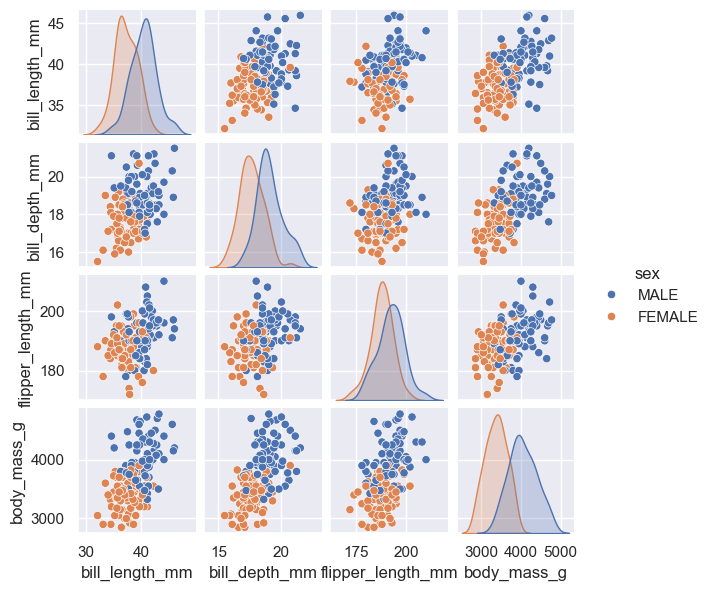

In [297]:
# Plotting 
sns.pairplot(adelie_penguins, hue="sex", height=1.5)

# Show
plt.show()


In [298]:
# How many female and male Adelie penguins are in the subset.
adelie_penguins["sex"].value_counts()

sex
MALE      73
FEMALE    73
Name: count, dtype: int64

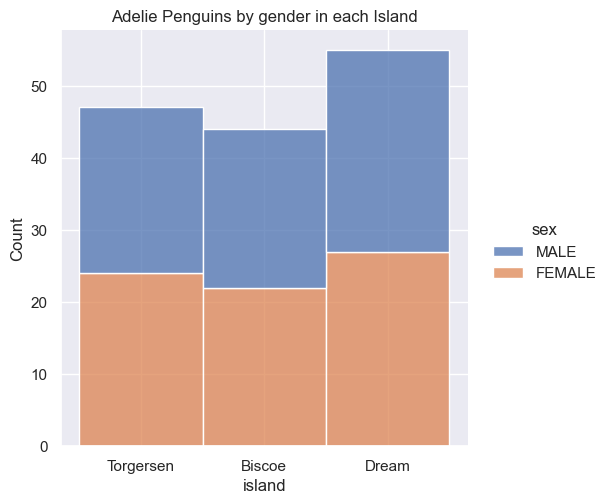

In [299]:
# Distribution of Adelie pengunins by sex in each island.
sns.displot(data=adelie_penguins, x="island", hue="sex", multiple="stack").set(title="Adelie Penguins by gender in each Island")

With the subset of Adelie penguins created I will create some bar charts to show how the variables of the dataset compare between female and male on this set.

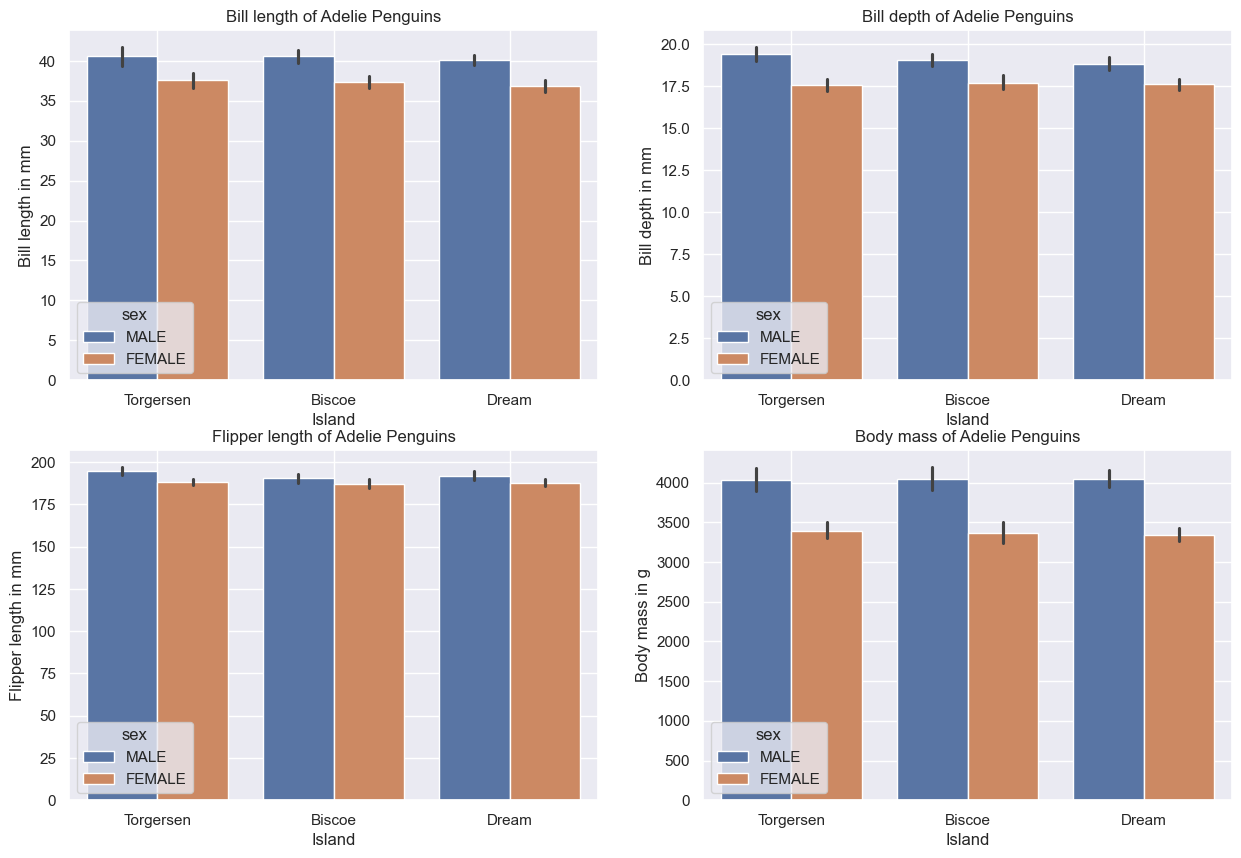

In [300]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(adelie_penguins, x="island", y="bill_length_mm", hue="sex", ax=axes[0, 0])
axes[0, 0].set_title("Bill length of Adelie Penguins")
axes[0, 0].set_xlabel("Island")
axes[0, 0].set_ylabel("Bill length in mm")
axes[0, 0].grid(True)
sns.barplot(adelie_penguins, x="island", y="bill_depth_mm", hue="sex", ax=axes[0, 1])
axes[0, 1].set_title("Bill depth of Adelie Penguins")
axes[0, 1].set_xlabel("Island")
axes[0, 1].set_ylabel("Bill depth in mm")
axes[0, 1].grid(True)
sns.barplot(adelie_penguins, x="island", y="flipper_length_mm", hue="sex", ax=axes[1, 0])
axes[1, 0].set_title("Flipper length of Adelie Penguins")
axes[1, 0].set_xlabel("Island")
axes[1, 0].set_ylabel("Flipper length in mm")
axes[1, 0].grid(True)
sns.barplot(adelie_penguins, x="island", y="body_mass_g", hue="sex", ax=axes[1, 1])
axes[1, 1].set_title("Body mass of Adelie Penguins")
axes[1, 1].set_xlabel("Island")
axes[1, 1].set_ylabel("Body mass in g")
axes[1, 1].grid(True)


From the bar chart tables we can see that in the Adelie species there is no big difference in bill length, bill depth, flipper length and body mass between penguins of the same specie between islands.

Comparing female and male penguins we see that there is little difference in flipper length between female and male penguins with the females values just near the males. The biggest difference between female and male penguins of Adelie specie is in their body mass, where male penguins' body mass is around 4000g and females 3400-3500g.

__Exploring dataset using two variables__
***
For this part of the project I will use two variables from the numerical data:
1. Body mass in g.
2. Bill depth in mm.

__Why choose this two variables:__

During my research for this project I noticed that has been a lot of analysis between bill depth and bill length, bill length and flipper length, and not so much between body mass versus bill depth.

#### Adding a Best Fit Line
***
_What is a Best Fit Line?_

A Best Fit Line is:

- A line of best fit is a straight line that minimizes the distance between it and some data.
- The line of best fit is used to express a relationship in a scatter plot of different data points.
- It is an output of regression analysis and can be used as a prediction tool. 

I will first create two arrays from the Adelie subset to hold values for body mass and bill depth.

In [301]:
# Creating an array of body mass values of Adelie subset.
adelie_body_mass = adelie_penguins["body_mass_g"].to_numpy()
adelie_body_mass

array([3750., 3800., 3250., 3450., 3650., 3625., 4675., 3200., 3800.,
       4400., 3700., 3450., 4500., 3325., 4200., 3400., 3600., 3800.,
       3950., 3800., 3800., 3550., 3200., 3150., 3950., 3250., 3900.,
       3300., 3900., 3325., 4150., 3950., 3550., 3300., 4650., 3150.,
       3900., 3100., 4400., 3000., 4600., 3425., 3450., 4150., 3500.,
       4300., 3450., 4050., 2900., 3700., 3550., 3800., 2850., 3750.,
       3150., 4400., 3600., 4050., 2850., 3950., 3350., 4100., 3050.,
       4450., 3600., 3900., 3550., 4150., 3700., 4250., 3700., 3900.,
       3550., 4000., 3200., 4700., 3800., 4200., 3350., 3550., 3800.,
       3500., 3950., 3600., 3550., 4300., 3400., 4450., 3300., 4300.,
       3700., 4350., 2900., 4100., 3725., 4725., 3075., 4250., 2925.,
       3550., 3750., 3900., 3175., 4775., 3825., 4600., 3200., 4275.,
       3900., 4075., 2900., 3775., 3350., 3325., 3150., 3500., 3450.,
       3875., 3050., 4000., 3275., 4300., 3050., 4000., 3325., 3500.,
       3500., 4475.,

In [302]:
# Creating an array of bill depth values from Adelie subset.
adelie_bill_depth = adelie_penguins["bill_depth_mm"].to_numpy()
adelie_bill_depth

array([18.7, 17.4, 18. , 19.3, 20.6, 17.8, 19.6, 17.6, 21.2, 21.1, 17.8,
       19. , 20.7, 18.4, 21.5, 18.3, 18.7, 19.2, 18.1, 17.2, 18.9, 18.6,
       17.9, 18.6, 18.9, 16.7, 18.1, 17.8, 18.9, 17. , 21.1, 20. , 18.5,
       19.3, 19.1, 18. , 18.4, 18.5, 19.7, 16.9, 18.8, 19. , 17.9, 21.2,
       17.7, 18.9, 17.9, 19.5, 18.1, 18.6, 17.5, 18.8, 16.6, 19.1, 16.9,
       21.1, 17. , 18.2, 17.1, 18. , 16.2, 19.1, 16.6, 19.4, 19. , 18.4,
       17.2, 18.9, 17.5, 18.5, 16.8, 19.4, 16.1, 19.1, 17.2, 17.6, 18.8,
       19.4, 17.8, 20.3, 19.5, 18.6, 19.2, 18.8, 18. , 18.1, 17.1, 18.1,
       17.3, 18.9, 18.6, 18.5, 16.1, 18.5, 17.9, 20. , 16. , 20. , 18.6,
       18.9, 17.2, 20. , 17. , 19. , 16.5, 20.3, 17.7, 19.5, 20.7, 18.3,
       17. , 20.5, 17. , 18.6, 17.2, 19.8, 17. , 18.5, 15.9, 19. , 17.6,
       18.3, 17.1, 18. , 17.9, 19.2, 18.5, 18.5, 17.6, 17.5, 17.5, 20.1,
       16.5, 17.9, 17.1, 17.2, 15.5, 17. , 16.8, 18.7, 18.6, 18.4, 17.8,
       18.1, 17.1, 18.5])

__Next step I'm plotting the arrays created in a graph.__

Text(0.5, 1.0, 'Adelie penguins dataset')

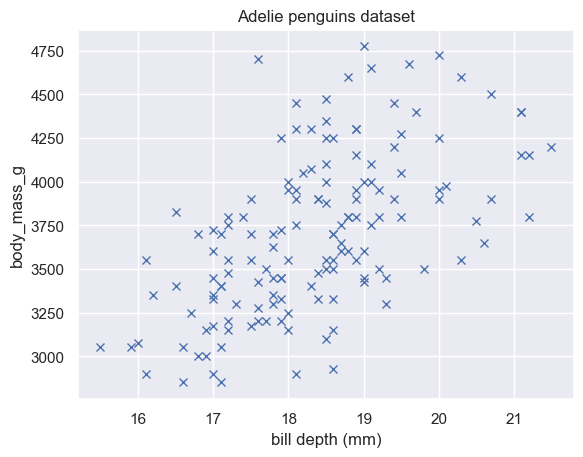

In [303]:
# Plotting the variables.
plt.plot(adelie_bill_depth, adelie_body_mass, "x")

# Axis labels.
plt.xlabel("bill depth (mm)")
plt.ylabel("body_mass_g")

# Title.
plt.title('Adelie penguins dataset')

Looking at the graph we can see that there is a there is a positive correlation between the two variables which means that, the Adelie penguins with a bigger bill depth have a bigger body mass. However the way our x's are scattered means that there is not a strong correlation between the variables.

In the next step I will try to add a Best Fit Line to this graph and see if there is any change in the results.

__Adding the Best Fit Line__

In [304]:
# Fit a straight line between x and y.
m, c = np.polyfit(adelie_bill_depth, adelie_body_mass, 1)

# Show m and c
m, c

(218.20954559534874, -297.382943741512)

Text(0.5, 1.0, 'Adelie subset')

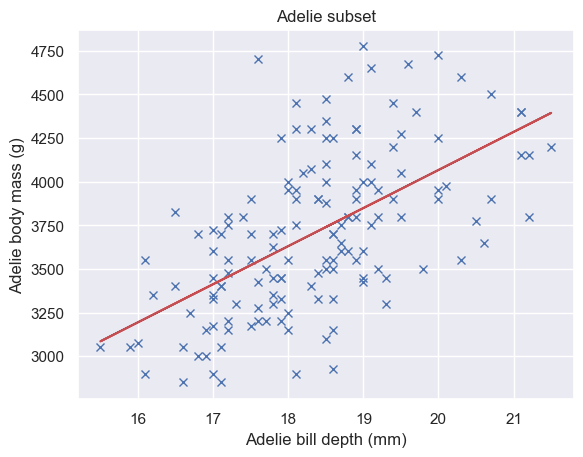

In [305]:
# Create a new figure and set of axis.
fig, ax = plt.subplots() 

# Assign x and y to the plot.
ax.plot(adelie_bill_depth, adelie_body_mass, 'x')

# Use the formula for Best Fit Line with my variables.
ax.plot(adelie_bill_depth, m * adelie_bill_depth + c, 'r-')

# Axis labels.
ax.set_xlabel("Adelie bill depth (mm)")
ax.set_ylabel("Adelie body mass (g)")

# Title.
ax.set_title('Adelie subset')

As we can see our best fit lines confirms the positive correlation between the two variables and shows us that this correlation is not strong. 
***
__Correlation__

Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It’s a common tool for describing simple relationships without making a statement about cause and effect.Ref: [Statistical Knowledge Portal-Correlation](https://www.jmp.com/en_au/statistics-knowledge-portal/what-is-correlation.html).

_Types of Correlation_

- Positive Correlation - when the two types of variables are moving in the same direction.
- Negative Correlation - when the two types of variables are moving in the opposite direction.
***

_Correlation Formula:_

$ r = \frac{\sum(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum(x_{i}-bar{x})^2\sum(y_{i}-\bar{y})^2}} $ where:

- $r$ = correlation coefficient
- $x_{i}$ = values of x variable
- $\bar{x}$ = mean of the values of the x variable
- $y_{i}$ = values of the y variable
- $\bar{y}$ = mean of the values of the y variable

Ref: [Common mathematical symbos](https://sakurachaojun.github.io/PSYO3505/others/latex.html)
***
__Analyzing my two variables using Pearson's Correlation coefficient__


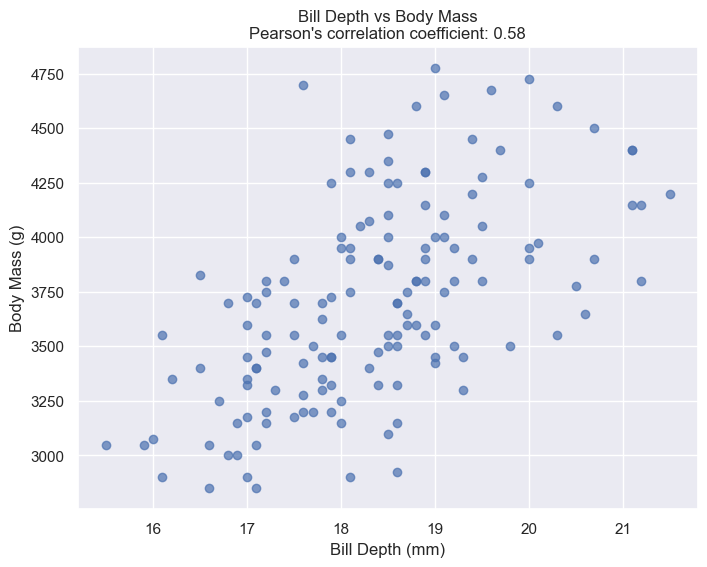

In [306]:
# Calculate Pearson's correlation coefficient
correlation_coef, _ = pearsonr(adelie_penguins['bill_depth_mm'], adelie_penguins['body_mass_g'])

# Plot the graph
plt.figure(figsize=(8, 6))
plt.scatter(adelie_penguins['bill_depth_mm'], adelie_penguins['body_mass_g'], alpha=0.7)
plt.title(f"Bill Depth vs Body Mass\nPearson's correlation coefficient: {correlation_coef:.2f}")
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Body Mass (g)')
plt.grid(True)
plt.show()

Using Pearson's correlation coefficient formula confirms for us again that there is a positive correlation between bill depth and body mass of Adelie species but not very a strong correlation. The coefficient 0.58 fall into the medium positive correlation.

__Checking correlation between all variables on the Adelie subset.__

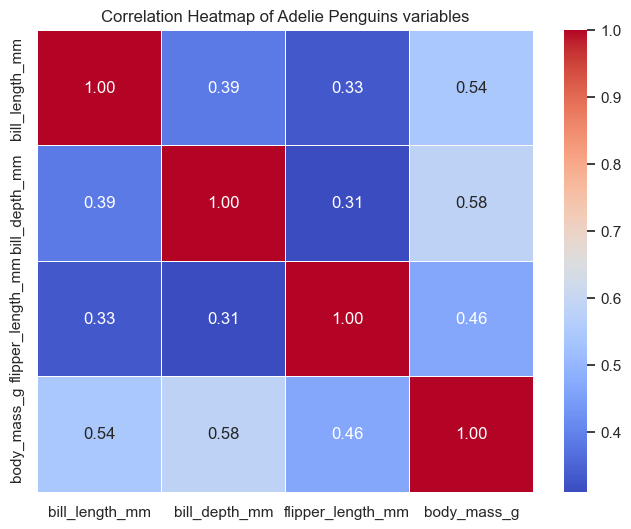

In [321]:
# Subset the Adelie dataset to include only the relevant variables
subset_adelie = adelie_penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Calculate correlation matrix
subset_correlation_matrix = subset_adelie.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Adelie Penguins variables")
plt.show()

As per our graph above we can see that the there is not a high positive correlation between variables of the Adelie's subset. The highest value of correlation is between bill depth and body mass (coefficient 0.58) that places it as a medium positive correlation value. The lowest correlation value is between flipper length and bill depth (coefficient 0.31).

***
#### Conclusion
_Did I get an answer for my question?_

No. After working with the Adelie penguins dataset, it's evident that the available data alone doesn't offer insights into why this species inhabits all three islands. Perhaps other factors, like the inability of other species to adapt to different environments maybe play a role...

Analyzing the Palmer Penguins dataset within Jupyter Notebook was in my opinion a great experience that broadened my Python skills in data analysis. Even though the first question I had wasn't immediately answered, this project gave me the chance to learn more about the several built-in Python libraries for graphing, making heatmaps, examining correlations, even fitting best-fit lines and writing mathematical equations. 

## Tables

***

|Species     |Bill Length  (mm)|Body Mass (g)|
|------------|----------------:|------------:|
|Adelie      |             38.8|         3701|
|Chinstrap   |             48.8|         3733|
|Gentoo      |             47.5|         5076|


## Reference:

- [Palmer Archipelago Penguins Data][1]

- [Palmer Penguins - Allison Horst](https://allisonhorst.github.io/palmerpenguins/)

[1]: https://journal.r-project.org/articles/RJ-2022-020/
- [Pandas-Parameters](https://www.w3schools.com/python/pandas/ref_df_dropna.asp)[3]
- [Pandas DataFrame describe()](https://www.w3schools.com/python/pandas/ref_df_describe.asp)[4]

- https://seaborn.pydata.org/tutorial/function_overview.html

- https://realpython.com/numpy-scipy-pandas-correlation-python/


***
## End
